In [1]:
# CSC 732 Final Project Part 1 Problem 1 Relu Sigmoid Adam Test Case
# Dominic Klusek, Jonathan Rozen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

<h2>Dataset Information</h2>
<p>The dogs vs cats dataset refers to a dataset used for a Kaggle machine learning competition held in 2013.

The dataset is comprised of photos of dogs and cats provided as a subset of photos from a much larger dataset of 3 million manually annotated photos. The dataset was developed as a partnership between Petfinder.com and Microsoft.

The dataset was originally used as a CAPTCHA (or Completely Automated Public Turing test to tell Computers and Humans Apart), that is, a task that it is believed a human finds trivial, but cannot be solved by a machine, used on websites to distinguish between human users and bots. Specifically, the task was referred to as “Asirra” or Animal Species Image Recognition for Restricting Access, a type of CAPTCHA We create our own subset that includes 2,000 training images, 1,000 validation images, and 1,000 testing images.</p>

<ul>
    <li><strong>Number of Instances: </strong>25,000</li>
    <li><strong>Number of Classes: </strong>2</li>
    <li><strong>Image Dimensions: </strong>Varies</li>
    <li><strong>Number of Channels: </strong>3</li>
</ul>

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.layers.core import Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
validation_dir = 'Datasets/Cats_vs_Dogs/val'
train_dir = 'Datasets/Cats_vs_Dogs/train'
test_dir = 'Datasets/Cats_vs_Dogs/test'

In [4]:
# set some hyper parameters for training
batch_size = 64
num_classes = 2
num_epochs = 30

In [5]:
# build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# compile the model to use binary crossentropy and use RMSProp optimizer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [7]:
# create training and testing image generators
# each using the images from their respective directories
train_datagen = ImageDataGenerator(
rescale=1./255.,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=batch_size,
class_mode='binary')

test_generator = train_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=batch_size,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=batch_size,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# fit the model to the image created by the generators
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=num_epochs,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 51s 505ms/step - loss: 0.6925 - acc: 0.5136 - val_loss: 0.6891 - val_acc: 0.6071
Epoch 2/30
100/100 [==============================] - 43s 430ms/step - loss: 0.6673 - acc: 0.5815 - val_loss: 0.6336 - val_acc: 0.6352
Epoch 3/30
100/100 [==============================] - 43s 431ms/step - loss: 0.6326 - acc: 0.6421 - val_loss: 0.5976 - val_acc: 0.7081
Epoch 4/30
100/100 [==============================] - 44s 442ms/step - loss: 0.6135 - acc: 0.6626 - val_loss: 0.5517 - val_acc: 0.7116
Epoch 5/30
100/100 [==============================] - 43s 434ms/step - loss: 0.5874 - acc: 0.6912 - val_loss: 0.6789 - val_acc: 0.7123
Epoch 6/30
100/100 [==============================] - 44s 438ms/step - loss: 0.5803 - acc: 0.6998 - val_loss: 0.6293 - val_acc: 0.6982
Epoch 7/30
100/100 [==============================] - 46s 462ms/step - loss: 0.5613 - acc: 0.7129 - val_loss: 0.6259 - val_acc: 0.7043
Epoch 8/30
100/100 [==============================] - 5

In [9]:
# save the model for future use 
model.save('cats_and_dogs_relu_sigmoid_Adam_20.h5')

In [10]:
#model.load_weights('cats_and_dogs_relu_sigmoid_Adam.h5')
# Evaluate classifier with test image generator
evaluation = model.evaluate_generator(test_generator, steps=100, verbose=1)
print("Test Loss: %.4f" % evaluation[0])
print("Test Accuracy: %.4f" % evaluation[1])

100/100 [==============================] - 40s 400ms/step
Test Loss: 0.5057
Test Accuracy: 0.8120


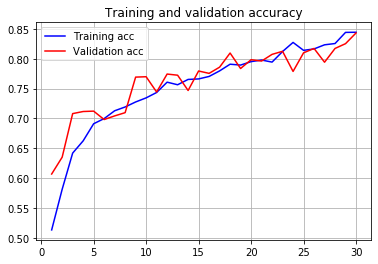

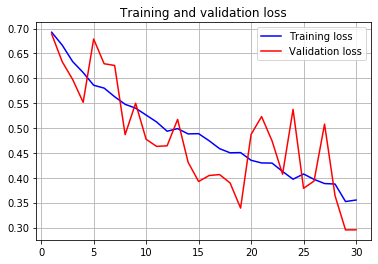

In [11]:
# plot accuracy and loss plots
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(facecolor='w')
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()
plt.figure(facecolor='w')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()

<h2>Visual Activation Maps</h2>

In [12]:
from keras.preprocessing import image
import numpy as np

#create list of randomly augmented images of two dogs
dog_images = []

for i in range(2):
    img = image.load_img("E:/klusek/Documents/CSC 767/Project 2/val/Dogs/dog.11014.jpg", target_size=(150,150))
    img_tensor = image.img_to_array(img)
    img_tensor = train_datagen.apply_transform(img_tensor, train_datagen.get_random_transform(img_tensor.shape))
    img_tensor = np.expand_dims(img_tensor,axis=0)
    img_tensor/=255
    dog_images.append(img_tensor)

for i in range(2):
    img = image.load_img("E:/klusek/Documents/CSC 767/Project 2/val/Dogs/dog.11024.jpg", target_size=(150,150))
    img_tensor = image.img_to_array(img)
    img_tensor = train_datagen.apply_transform(img_tensor, train_datagen.get_random_transform(img_tensor.shape))
    img_tensor = np.expand_dims(img_tensor,axis=0)
    img_tensor/=255
    dog_images.append(img_tensor)

#create list of randomly augmented images of two cats
cat_images = []

for i in range(2):
    img = image.load_img("E:/klusek/Documents/CSC 767/Project 2/val/Cats/cat.11014.jpg", target_size=(150,150))
    img_tensor = image.img_to_array(img)
    img_tensor = train_datagen.apply_transform(img_tensor, train_datagen.get_random_transform(img_tensor.shape))
    img_tensor = np.expand_dims(img_tensor,axis=0)
    img_tensor/=255
    cat_images.append(img_tensor)

for i in range(2):
    img = image.load_img("E:/klusek/Documents/CSC 767/Project 2/val/Cats/cat.11024.jpg", target_size=(150,150))
    img_tensor = image.img_to_array(img)
    img_tensor = train_datagen.apply_transform(img_tensor, train_datagen.get_random_transform(img_tensor.shape))
    img_tensor = np.expand_dims(img_tensor,axis=0)
    img_tensor/=255
    cat_images.append(img_tensor)

In [13]:
from keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

C:\Users\kluse\Anaconda3\envs\MLearning\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


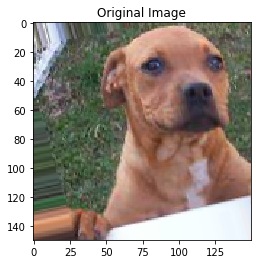

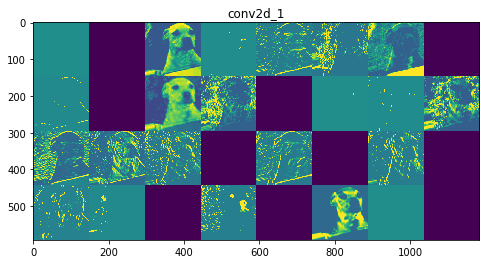

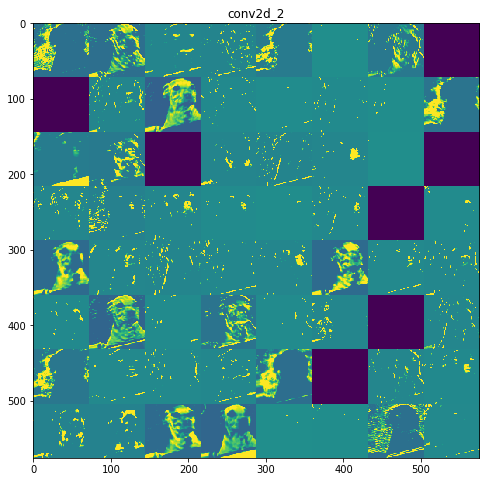

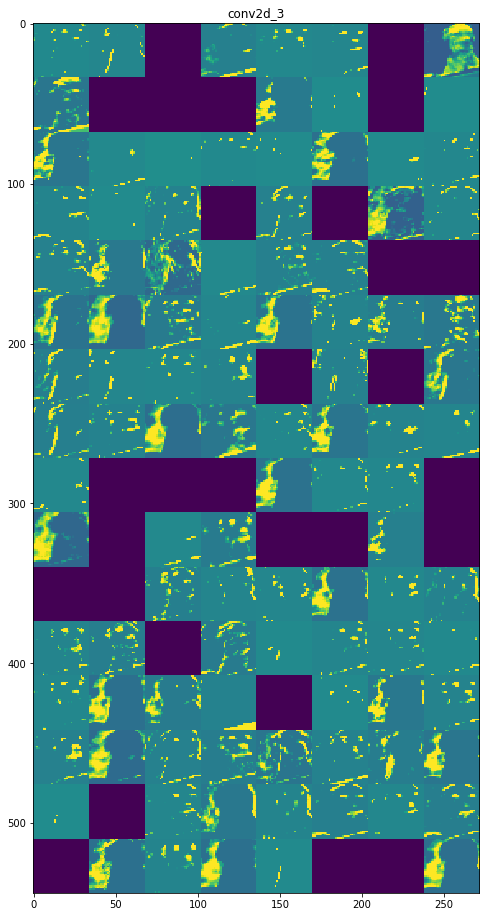

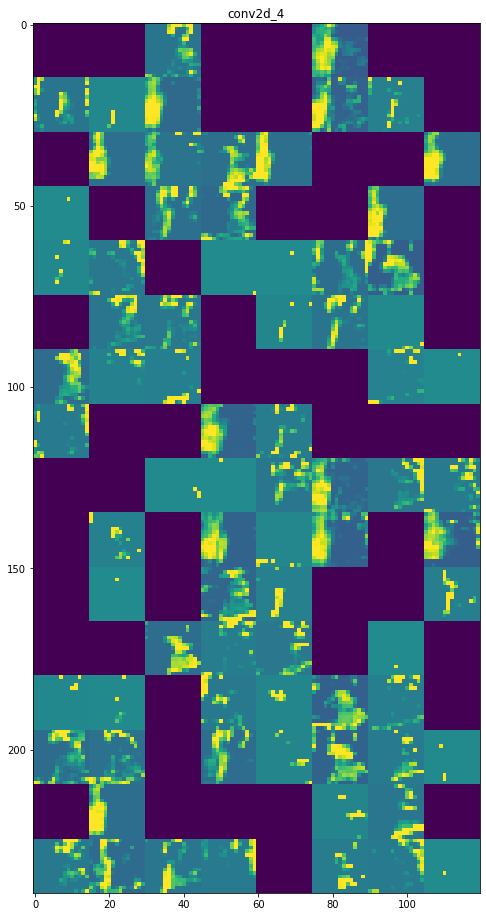

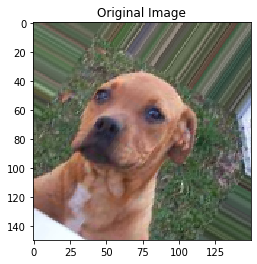

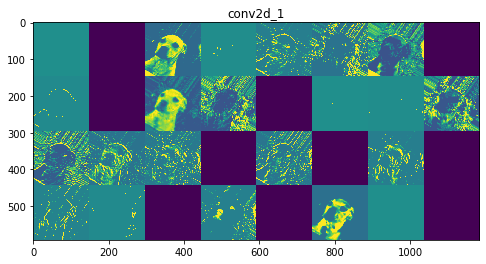

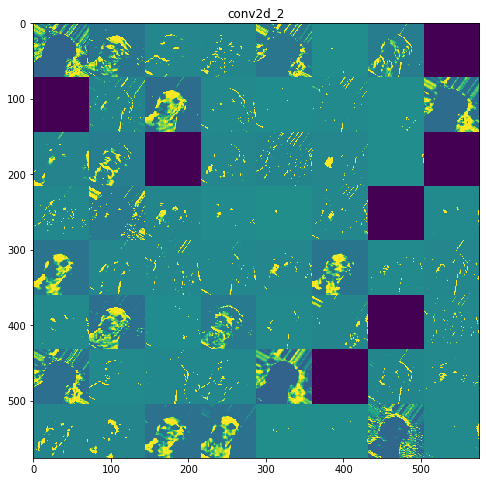

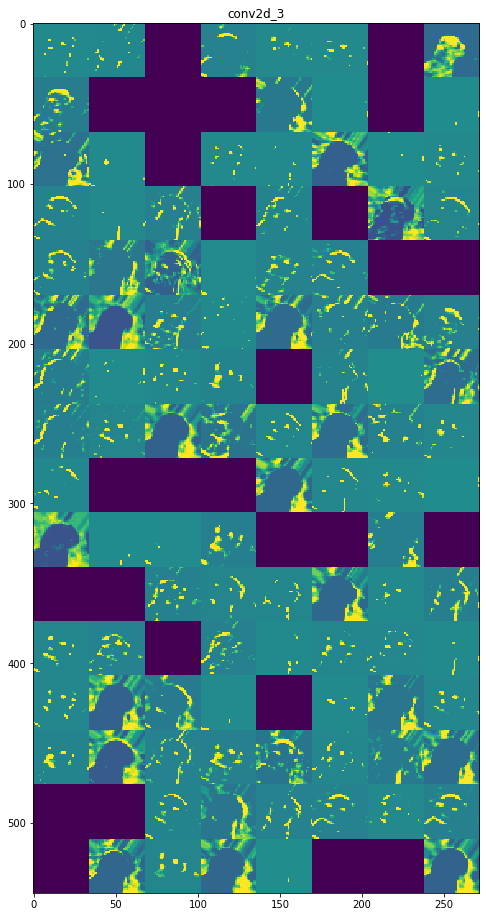

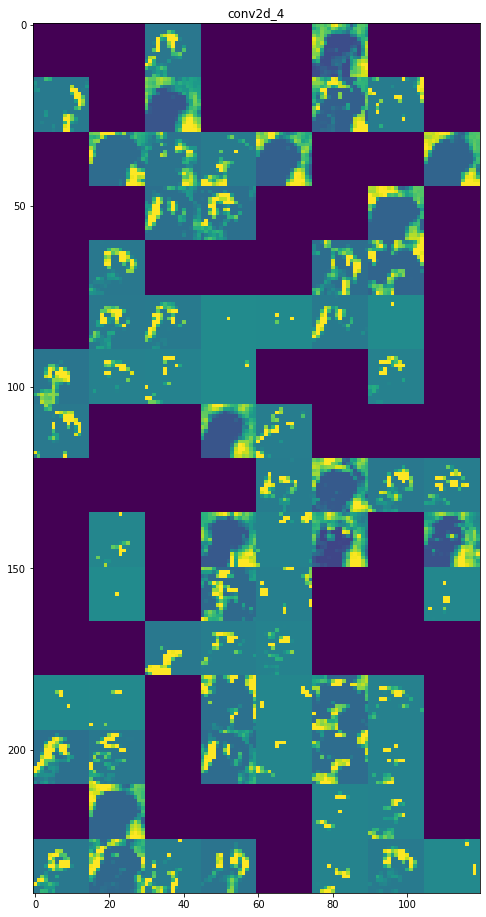

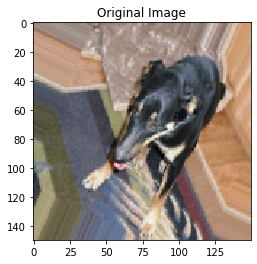

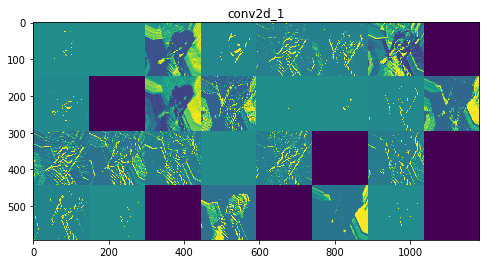

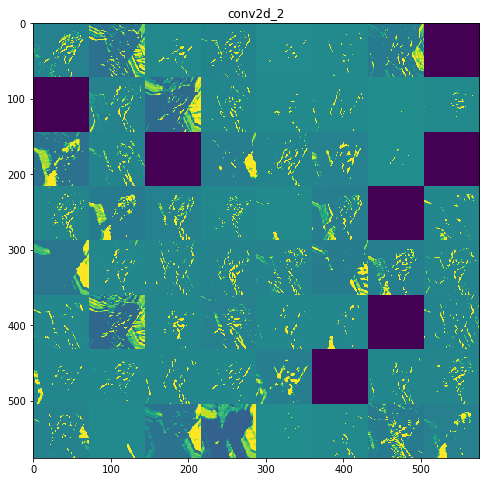

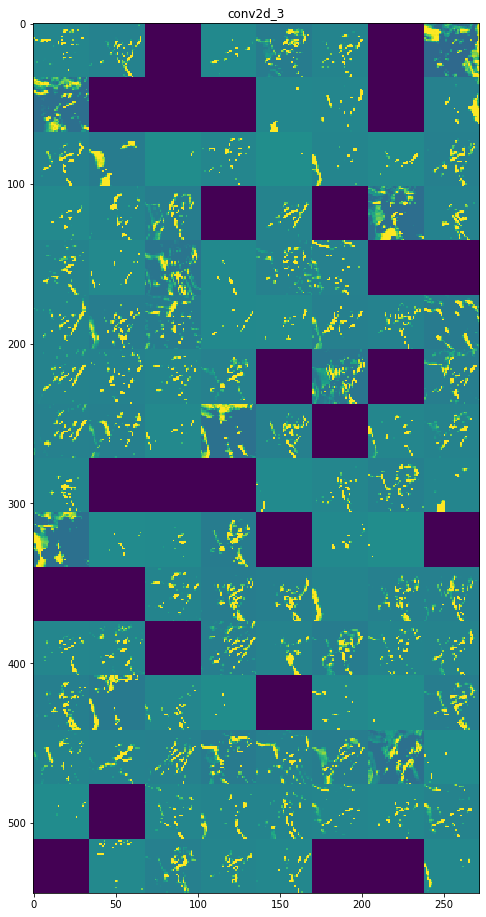

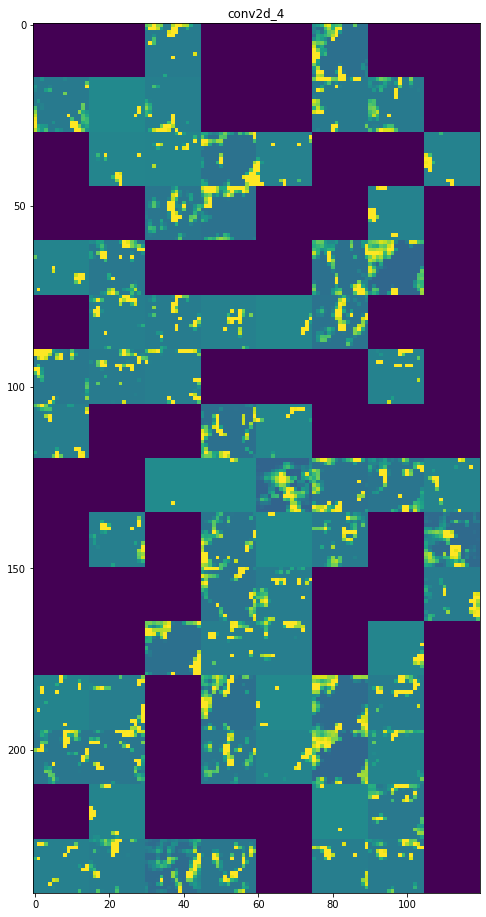

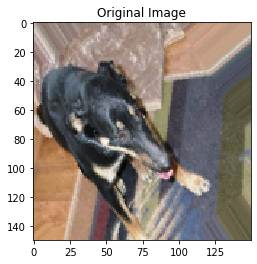

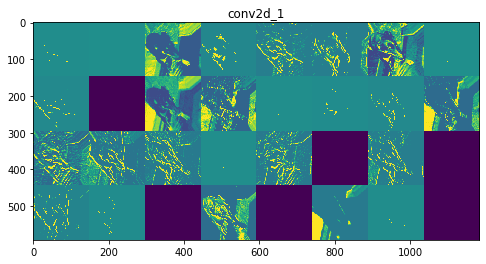

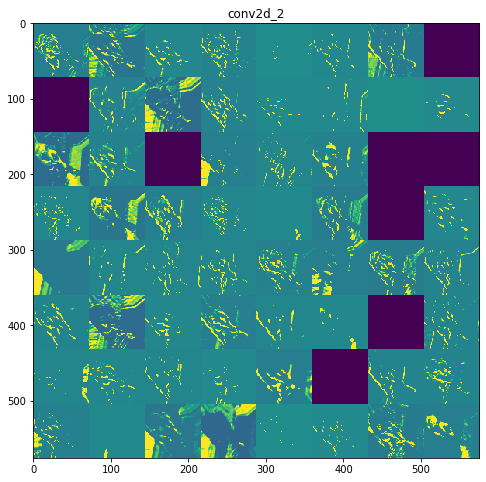

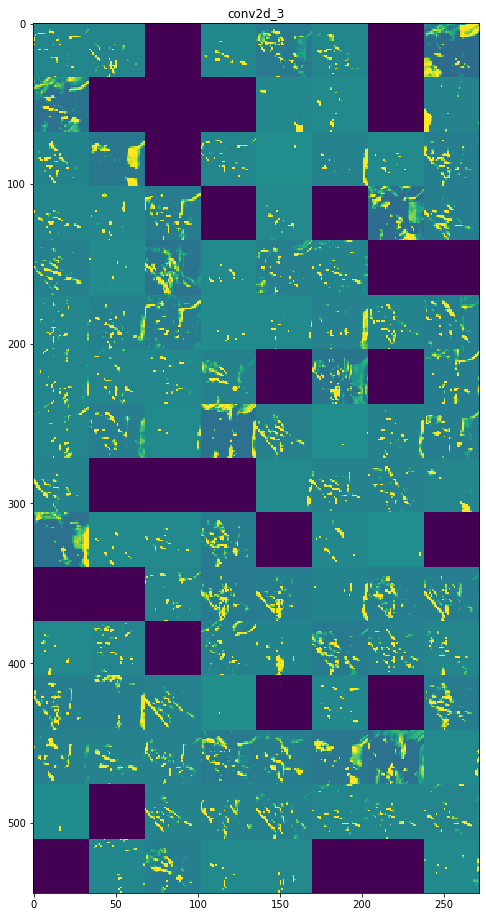

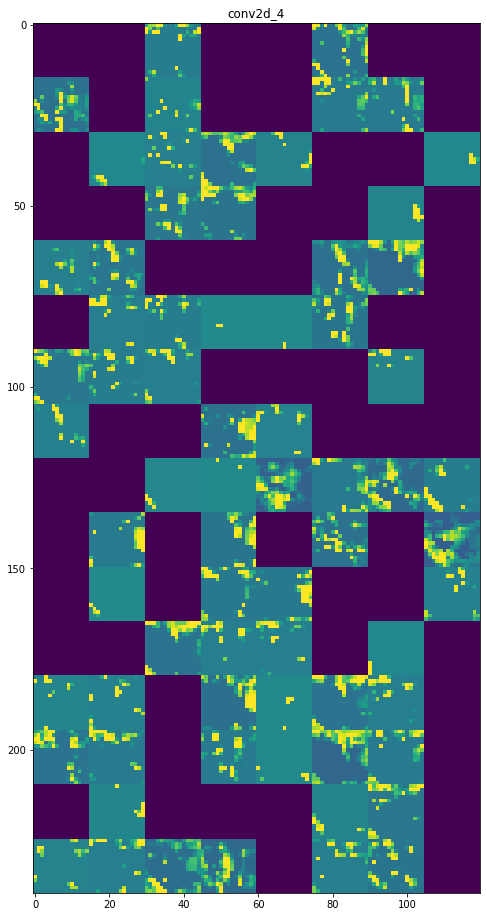

In [14]:
import numpy as np
import time
for img in dog_images:
    plt.title("Original Image")
    plt.imshow(img[0])
    activations = activation_model.predict(img)
    layer_names = [layer.name for layer in model.layers[0:11:3]]
    images_per_row = 8

    for layer_name, layer_activation in zip(layer_names, activations[0:11:3]):
        n_features = layer_activation.shape[-1]
    
        size = layer_activation.shape[1]
    
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :,col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image 

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]), facecolor='w')
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

C:\Users\kluse\Anaconda3\envs\MLearning\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


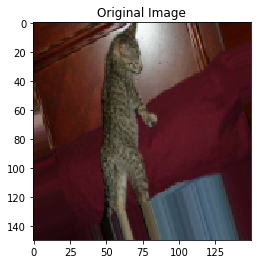

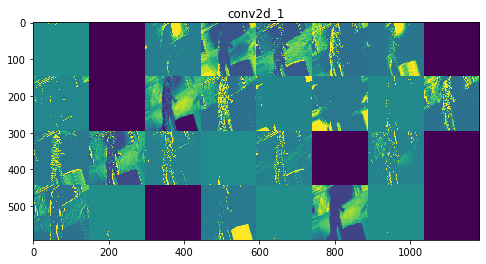

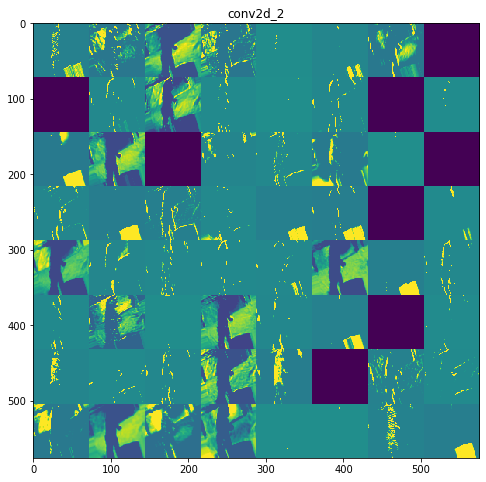

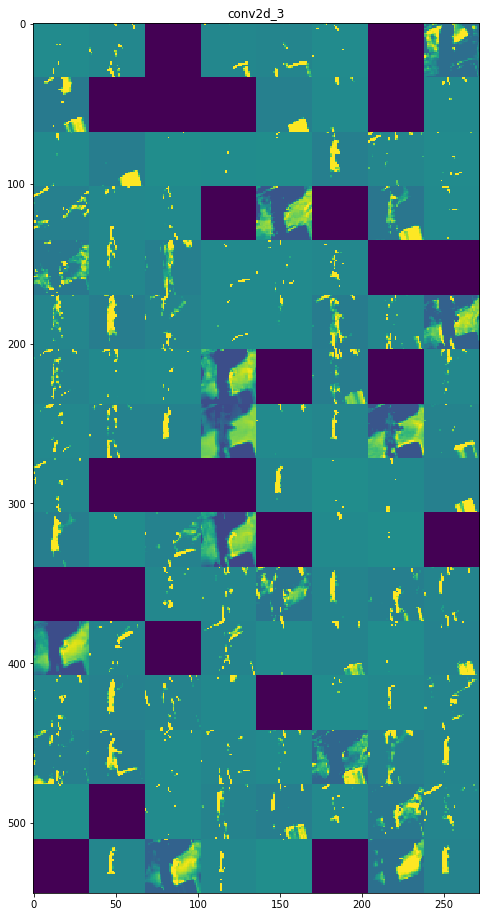

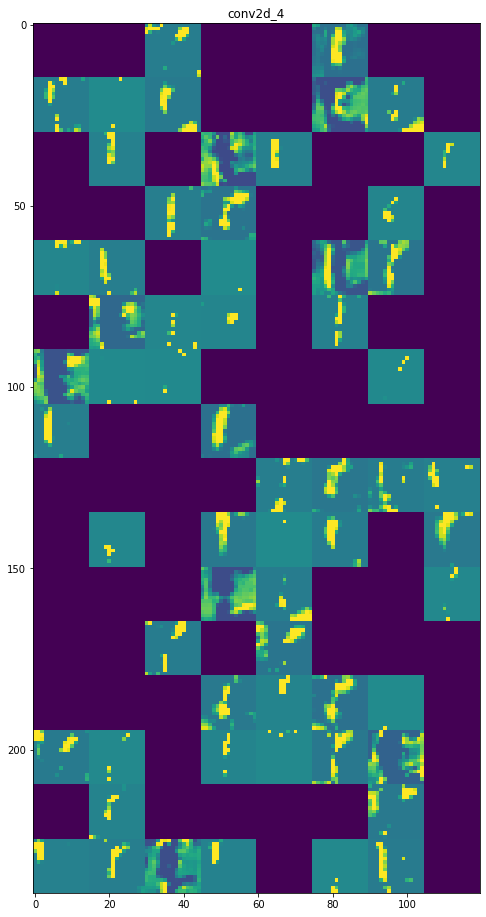

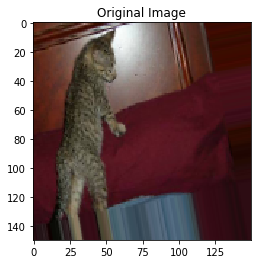

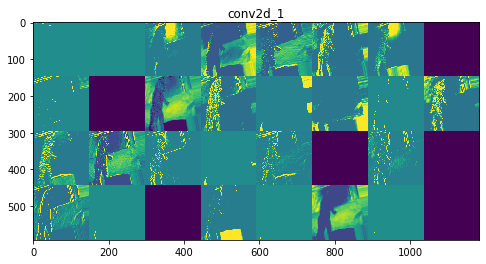

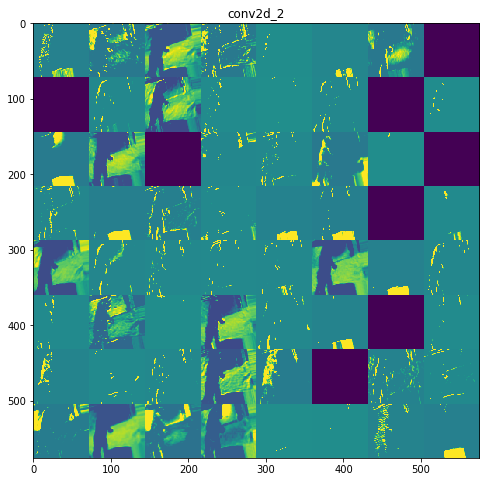

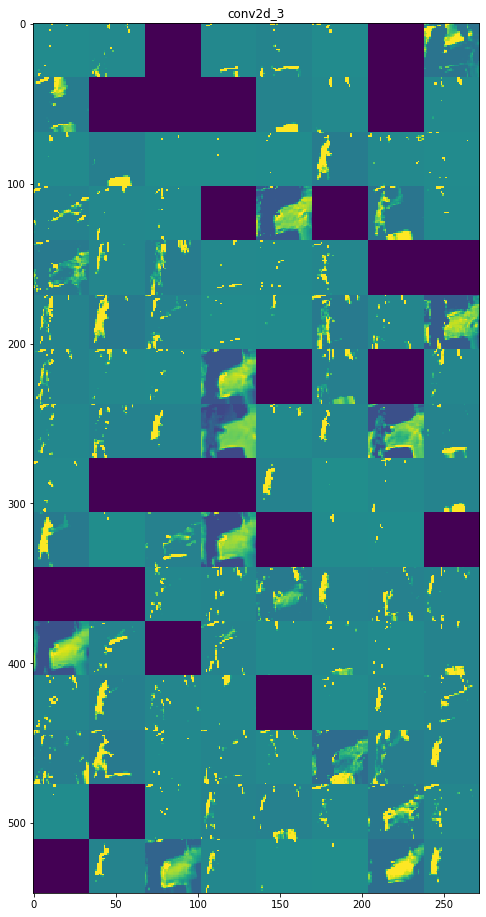

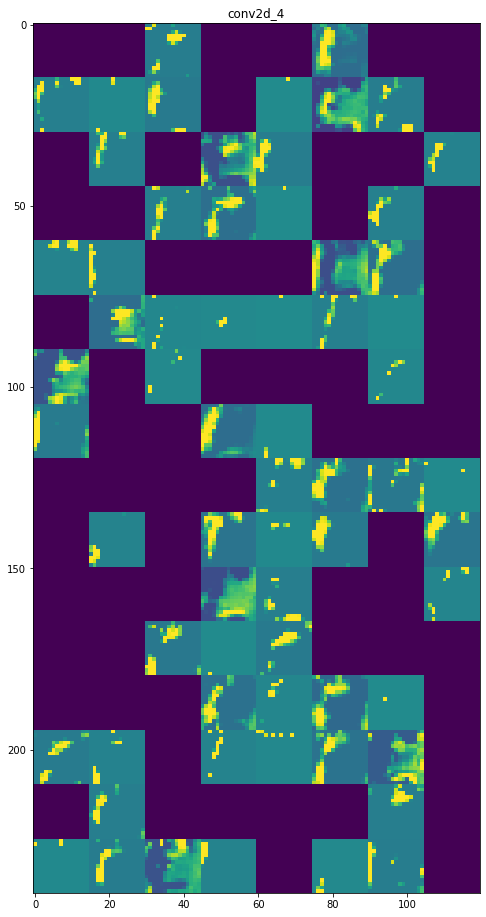

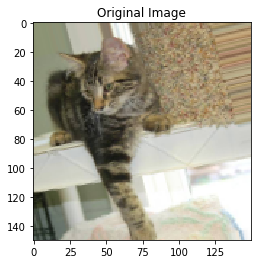

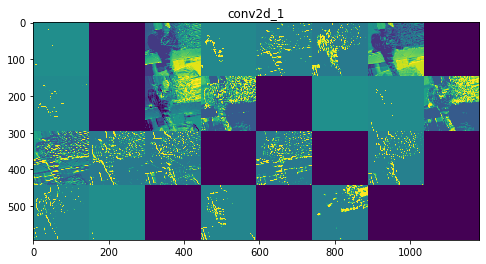

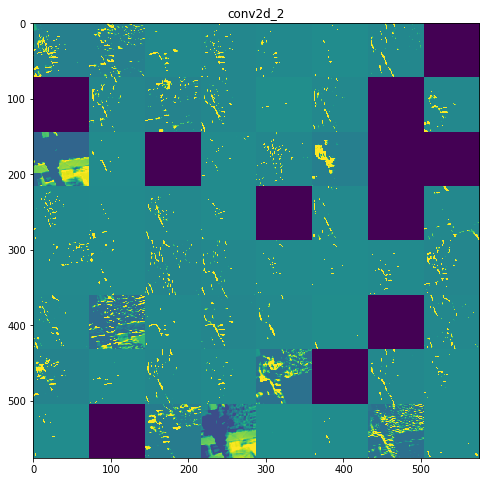

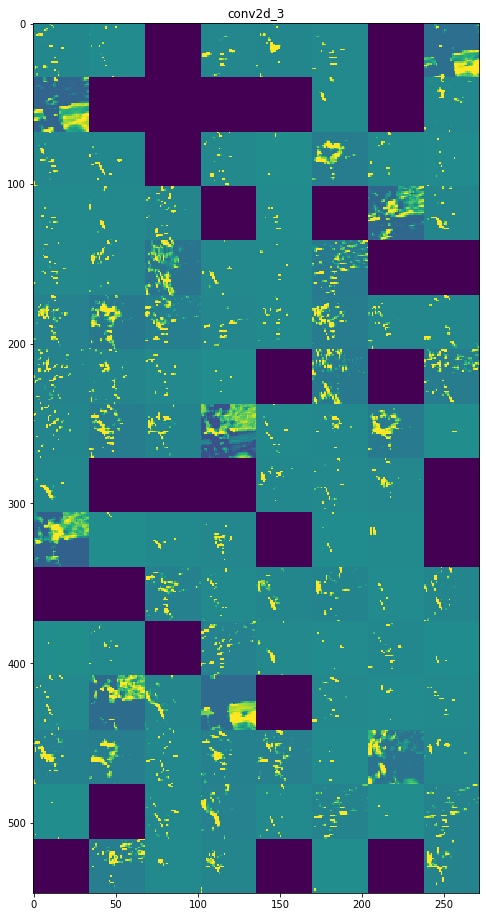

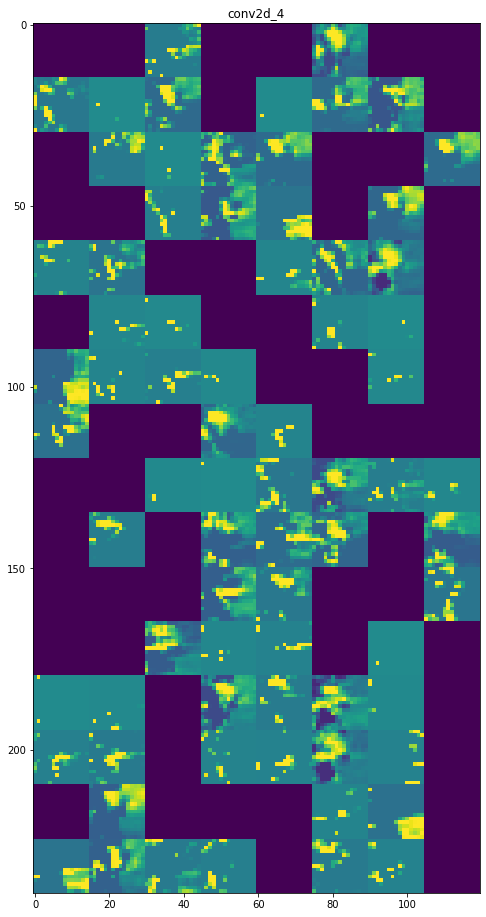

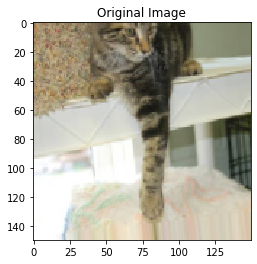

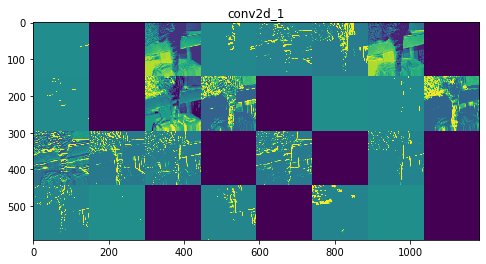

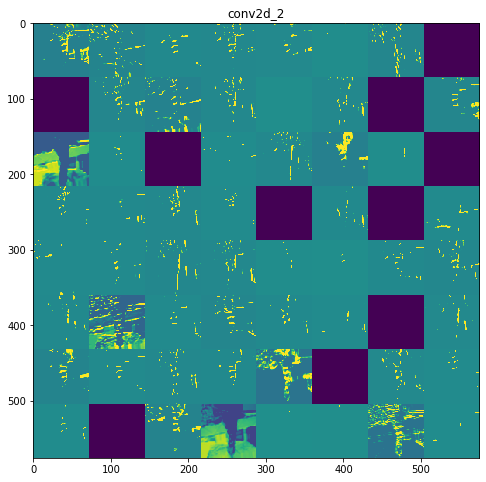

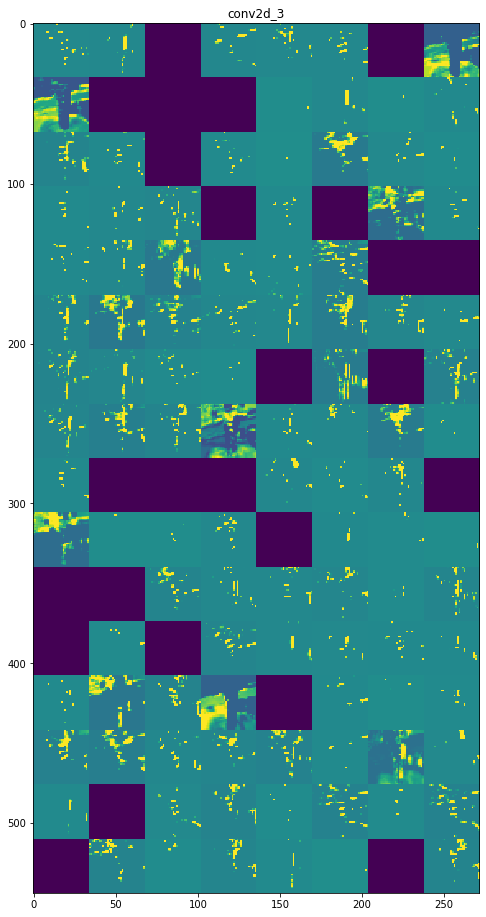

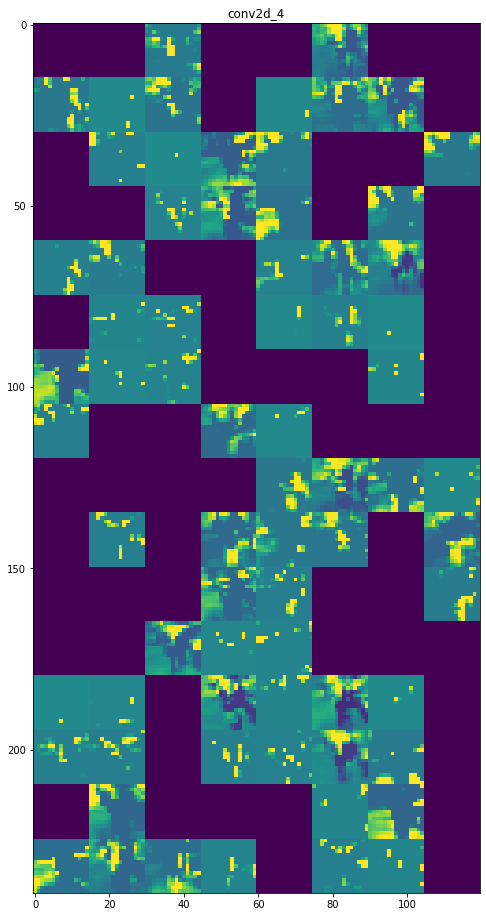

In [15]:
import numpy as np
import time
for img in cat_images:
    plt.title("Original Image")
    plt.imshow(img[0])
    activations = activation_model.predict(img)
    layer_names = [layer.name for layer in model.layers[0:11:3]]
    images_per_row = 8

    for layer_name, layer_activation in zip(layer_names, activations[0:11:3]):
        n_features = layer_activation.shape[-1]
    
        size = layer_activation.shape[1]
    
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :,col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image 

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]), facecolor='w')
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

<p>Visualizing the activation maps when the CNN makes a prediction is a good way to visualize the type of data that is being collected and how it is abstracted by later layers. For instance when we look at the first layer conv2d_1 seems to collect some fur textyre, silhouette, contours, and other such data; then conv2d_2 collects similar data, then for other layers the data becomes more generalized and abstract compared to the first 2 layers due to the dimensionality reduction. We can also see all the filters that do not contribute much or those that have been set to 0 by the dropout function.</p>

<h2>Visualizing Filters</h2>

In [17]:
def deprocess_image(x):
    """utility function to convert a float array into a valid uint8 image.

    # Arguments
        x: A numpy-array representing the generated image.

    # Returns
        A processed numpy-array, which could be used in e.g. imshow.
    """
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [18]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

In [19]:
#model = load_model('cats_and_dogs_small_2.h5')
layer_names = [layer.name for layer in model.layers]
layer_output = model.get_layer(layer_names[0]).output
print(layer_names)

['conv2d_1', 'max_pooling2d_1', 'dropout_1', 'conv2d_2', 'max_pooling2d_2', 'dropout_2', 'conv2d_3', 'max_pooling2d_3', 'dropout_3', 'conv2d_4', 'max_pooling2d_4', 'dropout_4', 'flatten_1', 'dense_1']


Tensor("conv2d_1/Relu:0", shape=(None, 148, 148, 32), dtype=float32)
32
(8, 4)


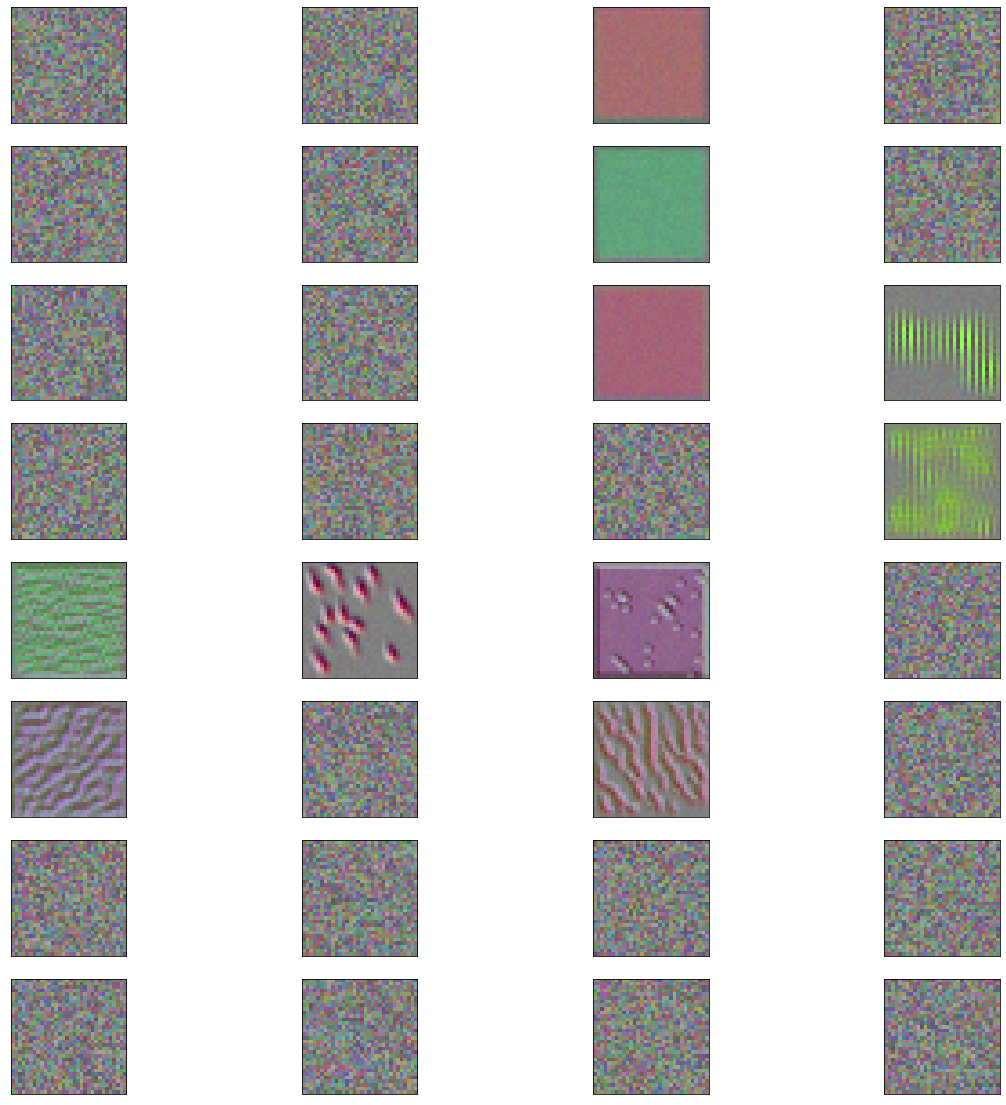

Tensor("conv2d_2/Relu:0", shape=(None, 72, 72, 64), dtype=float32)
64
(8, 8)


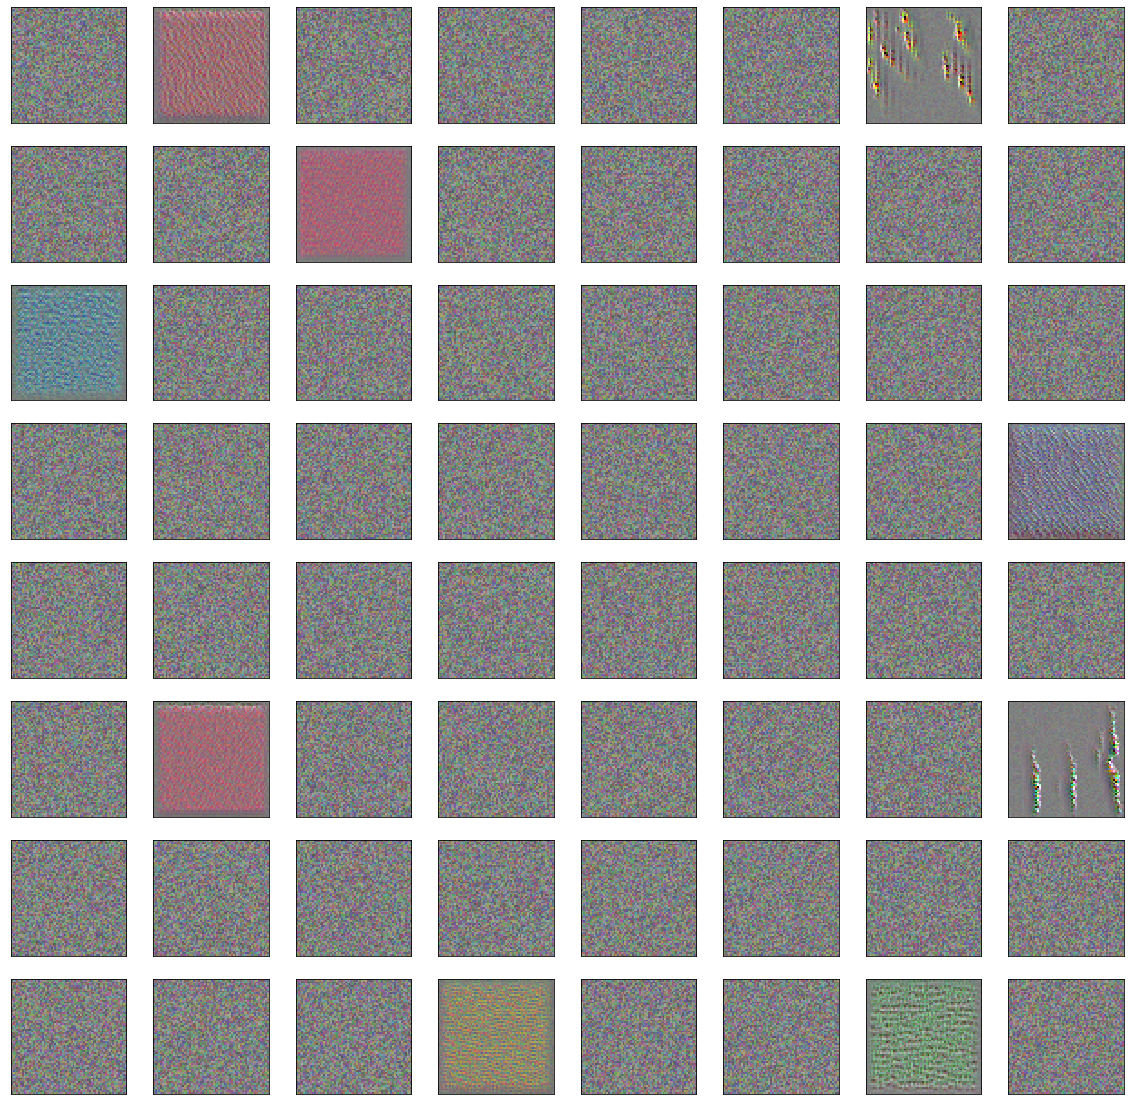

Tensor("conv2d_3/Relu:0", shape=(None, 34, 34, 128), dtype=float32)
128
(16, 8)


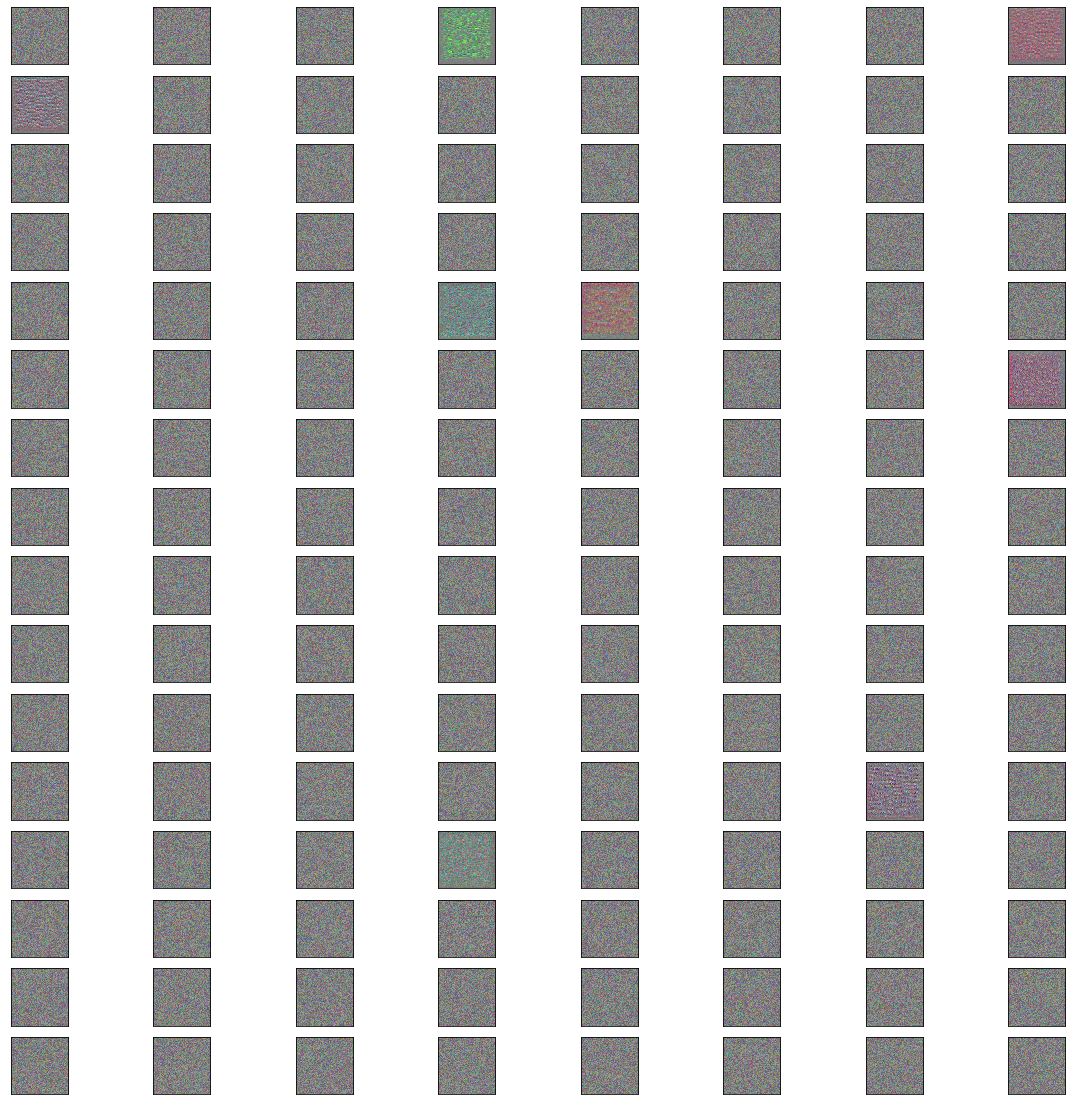

Tensor("conv2d_4/Relu:0", shape=(None, 15, 15, 128), dtype=float32)
128
(16, 8)


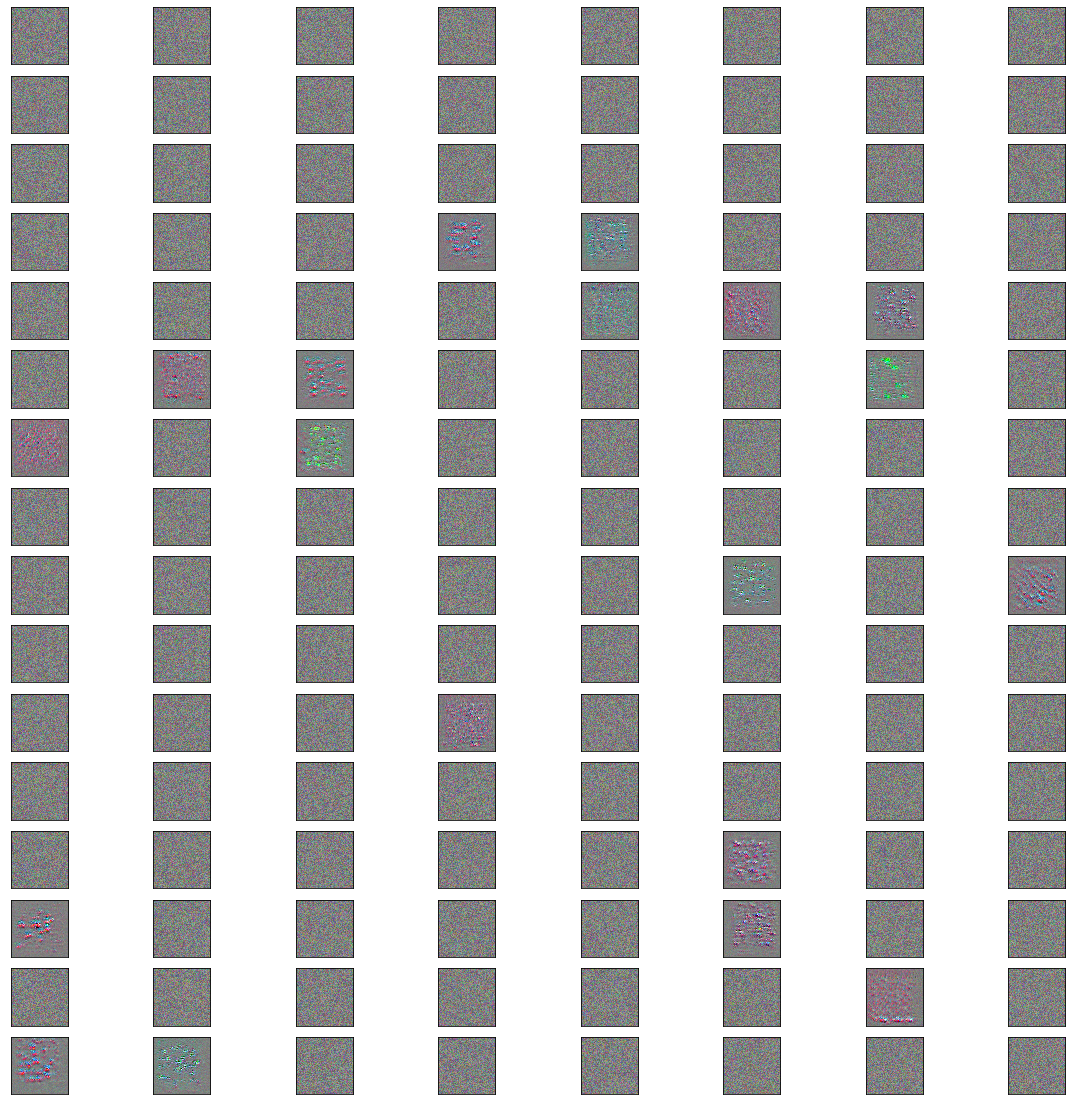

In [20]:
# plot the filters for convolutional layers utilizing gradient decompositiong
sizes = [32,64,128,128]
num_rows_and_columns = [(8,4),(8,8),(16,8),(16,8),(16,8),(16,8)]
index = 1
for layer_name, size, c_and_n in zip(layer_names[0:11:3], sizes, num_rows_and_columns):
    print(model.get_layer(layer_name).output)
    print(size)
    print(c_and_n)
    plt.figure(figsize=(20,20), facecolor='w')
    plt.title(layer_name)
    for i in range(size):
        filter_img = generate_pattern(layer_name, i, size=size)
        plt.subplot(c_and_n[0],c_and_n[1],index)
        plt.imshow(filter_img)
        plt.xticks([])
        plt.yticks([])
        index = index + 1
    index = 1
    plt.show()